In [1]:
# clone YOLOv5 repo
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16517, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 16517 (delta 45), reused 50 (delta 16), pack-reused 16402
Receiving objects: 100% (16517/16517), 15.12 MiB | 19.85 MiB/s, done.
Resolving deltas: 100% (11307/11307), done.
/content/yolov5


In [2]:
# Install the dependencies
!pip install -qr requirements.txt
import torch

from IPython.display import Image, clear_output  # to display images

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.0/721.0 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00


In [3]:
pwd

'/content/yolov5'

In [20]:
%cd /content

/content


In [5]:
# import gdown

# url = "https://drive.google.com/file/d/19wWuQ6yeNrjMOrbJHwMtjk_zINGU2f1p/view?usp=sharing"
# file_id = url.split("/")[-2]
# print(file_id)
# prefix = 'https://drive.google.com/uc?/export=download&id='
# try:
#     gdown.download(prefix+file_id, "data/waste_data.zip")
# except Exception as e:
#     print(f"Error: {e}")
# print('Data downloaded!')

19wWuQ6yeNrjMOrbJHwMtjk_zINGU2f1p
Error: Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?/export=download&id=19wWuQ6yeNrjMOrbJHwMtjk_zINGU2f1p

but Gdown can't. Please check connections and permissions.
Data downloaded!


In [5]:
!unzip waste_detection.zip
!rm -rf waste-detection.zip

Archive:  waste_detection.zip
   creating: train/
   creating: train/images/
  inflating: train/images/PlasticBottle_30_jpg.rf.4edbda3acb9b8bc713a177fa435ec1d1.jpg  
  inflating: train/images/PlasticBag_37_JPG_jpg.rf.64813dd915725171a7d451c6f3914c4e.jpg  
  inflating: train/images/Banana_10_jpg.rf.7c0536bc9eb72ec77c8f515653f44fb9.jpg  
  inflating: train/images/Banana_11_jpg.rf.188551ec3d51326e5562675d285d0e6a.jpg  
  inflating: train/images/Banana_12_jpg.rf.2ecabc9628a9611963e4804d13045377.jpg  
  inflating: train/images/Banana_12_jpg.rf.e951f9b4b66c9896ce6b7a56f9d41438.jpg  
  inflating: train/images/Banana_15_jpg.rf.09c5d34e95e0c06a808a99533e8e737c.jpg  
  inflating: train/images/Banana_15_jpg.rf.c2909c26fa3140f1734b451bead6752b.jpg  
  inflating: train/images/Banana_15_jpg.rf.e7fb3723604fb753bdbca26f382d7aaf.jpg  
  inflating: train/images/Banana_16_jpg.rf.504aa1c1679f9d595e336eba25f6d80c.jpg  
  inflating: train/images/Banana_16_jpg.rf.73833169c2979508c979f27bcb572959.jpg  
  infl

In [17]:
%cat data.yaml

cat: data.yaml: No such file or directory


# Model Configuration and Arhitecture

### We will write a yaml script that defines the parameters for our model like: number of classe, anchors, and each layer.

In [21]:
# define the number of classes based on YAML
import yaml
with open('data.yaml', 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

In [22]:
num_classes

'13'

In [23]:
# the model configuration we will use:
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 

In [24]:
# customise iPython writefile to write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [25]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

# Training Custom YOLOv5 Detector

## Lets get along with the training!
## We will be able to pass a number of arguments

*   img: define input image size
*   batch: determine batch size
*   epochs: define the number of training epochs
*   data: set the path to our yaml file
*   cfg: specify our model configuration
*   weights: specify a custom path to weights
*   name: result names
*   nosave: only save the final checkpoint
*   cache: cache images for faster training











In [28]:
# train yolo5 on custom data for 100 epochs and time its performance
%%time
%cd /content/yolov5
!python train.py --img 416 --batch 16 --epochs 200 --data '../data.yaml' --cfg ./models/custom_yolov5s.yaml --weights 'yolov5s.pt' --name yolov5s_results --cache

/content/yolov5
2024-03-10 18:57:18.691607: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 18:57:18.691663: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 18:57:18.692982: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=./models/custom_yolov5s.yaml, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, devi

## Evaluating our custom model
### Training losses and performance metrics are saved in Tensorboard and also in --name flag
### Plotting the results:

In [33]:
# Start tensorboard
%reload_ext tensorboard
%tensorboard --logdir runs

Reusing TensorBoard on port 6006 (pid 20087), started 0:06:07 ago. (Use '!kill 20087' to kill it.)

<IPython.core.display.Javascript object>

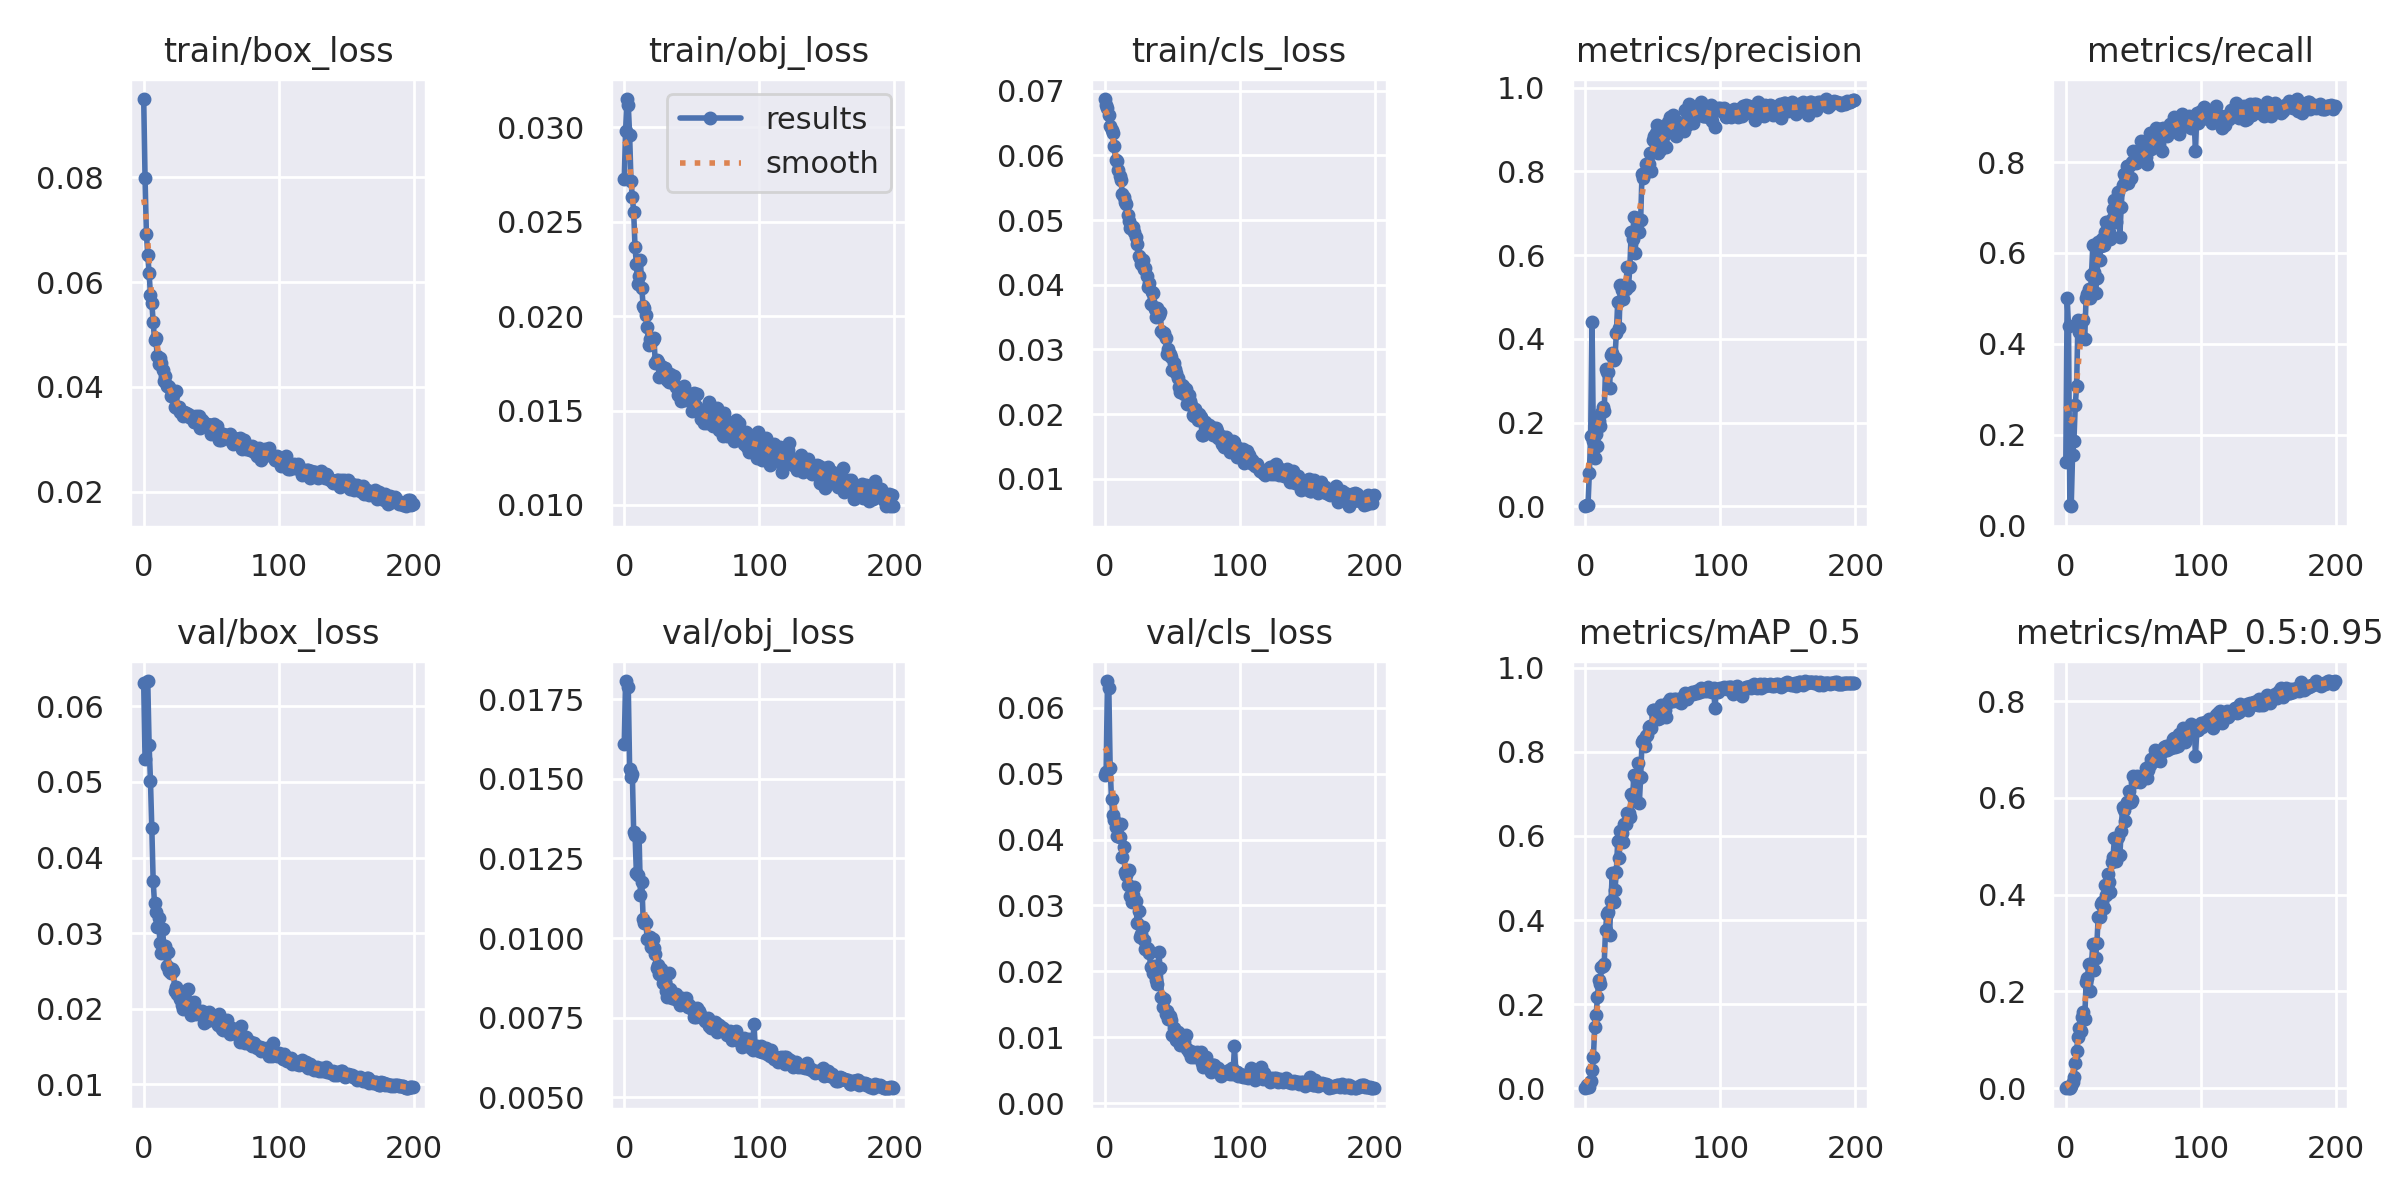

In [35]:
# manual plots (if tensorboard isn't working)
from utils.plots import plot_results
Image(filename='/content/yolov5/runs/train/yolov5s_results4/results.png', width=1000)

## For curiosity sake, we can visualise the training
### Mosaic dataloaders are used for this task. It was developed by Glenn Jocher and was first featured in YOLOv4

GROUND TRUTH TRAINING DATA:


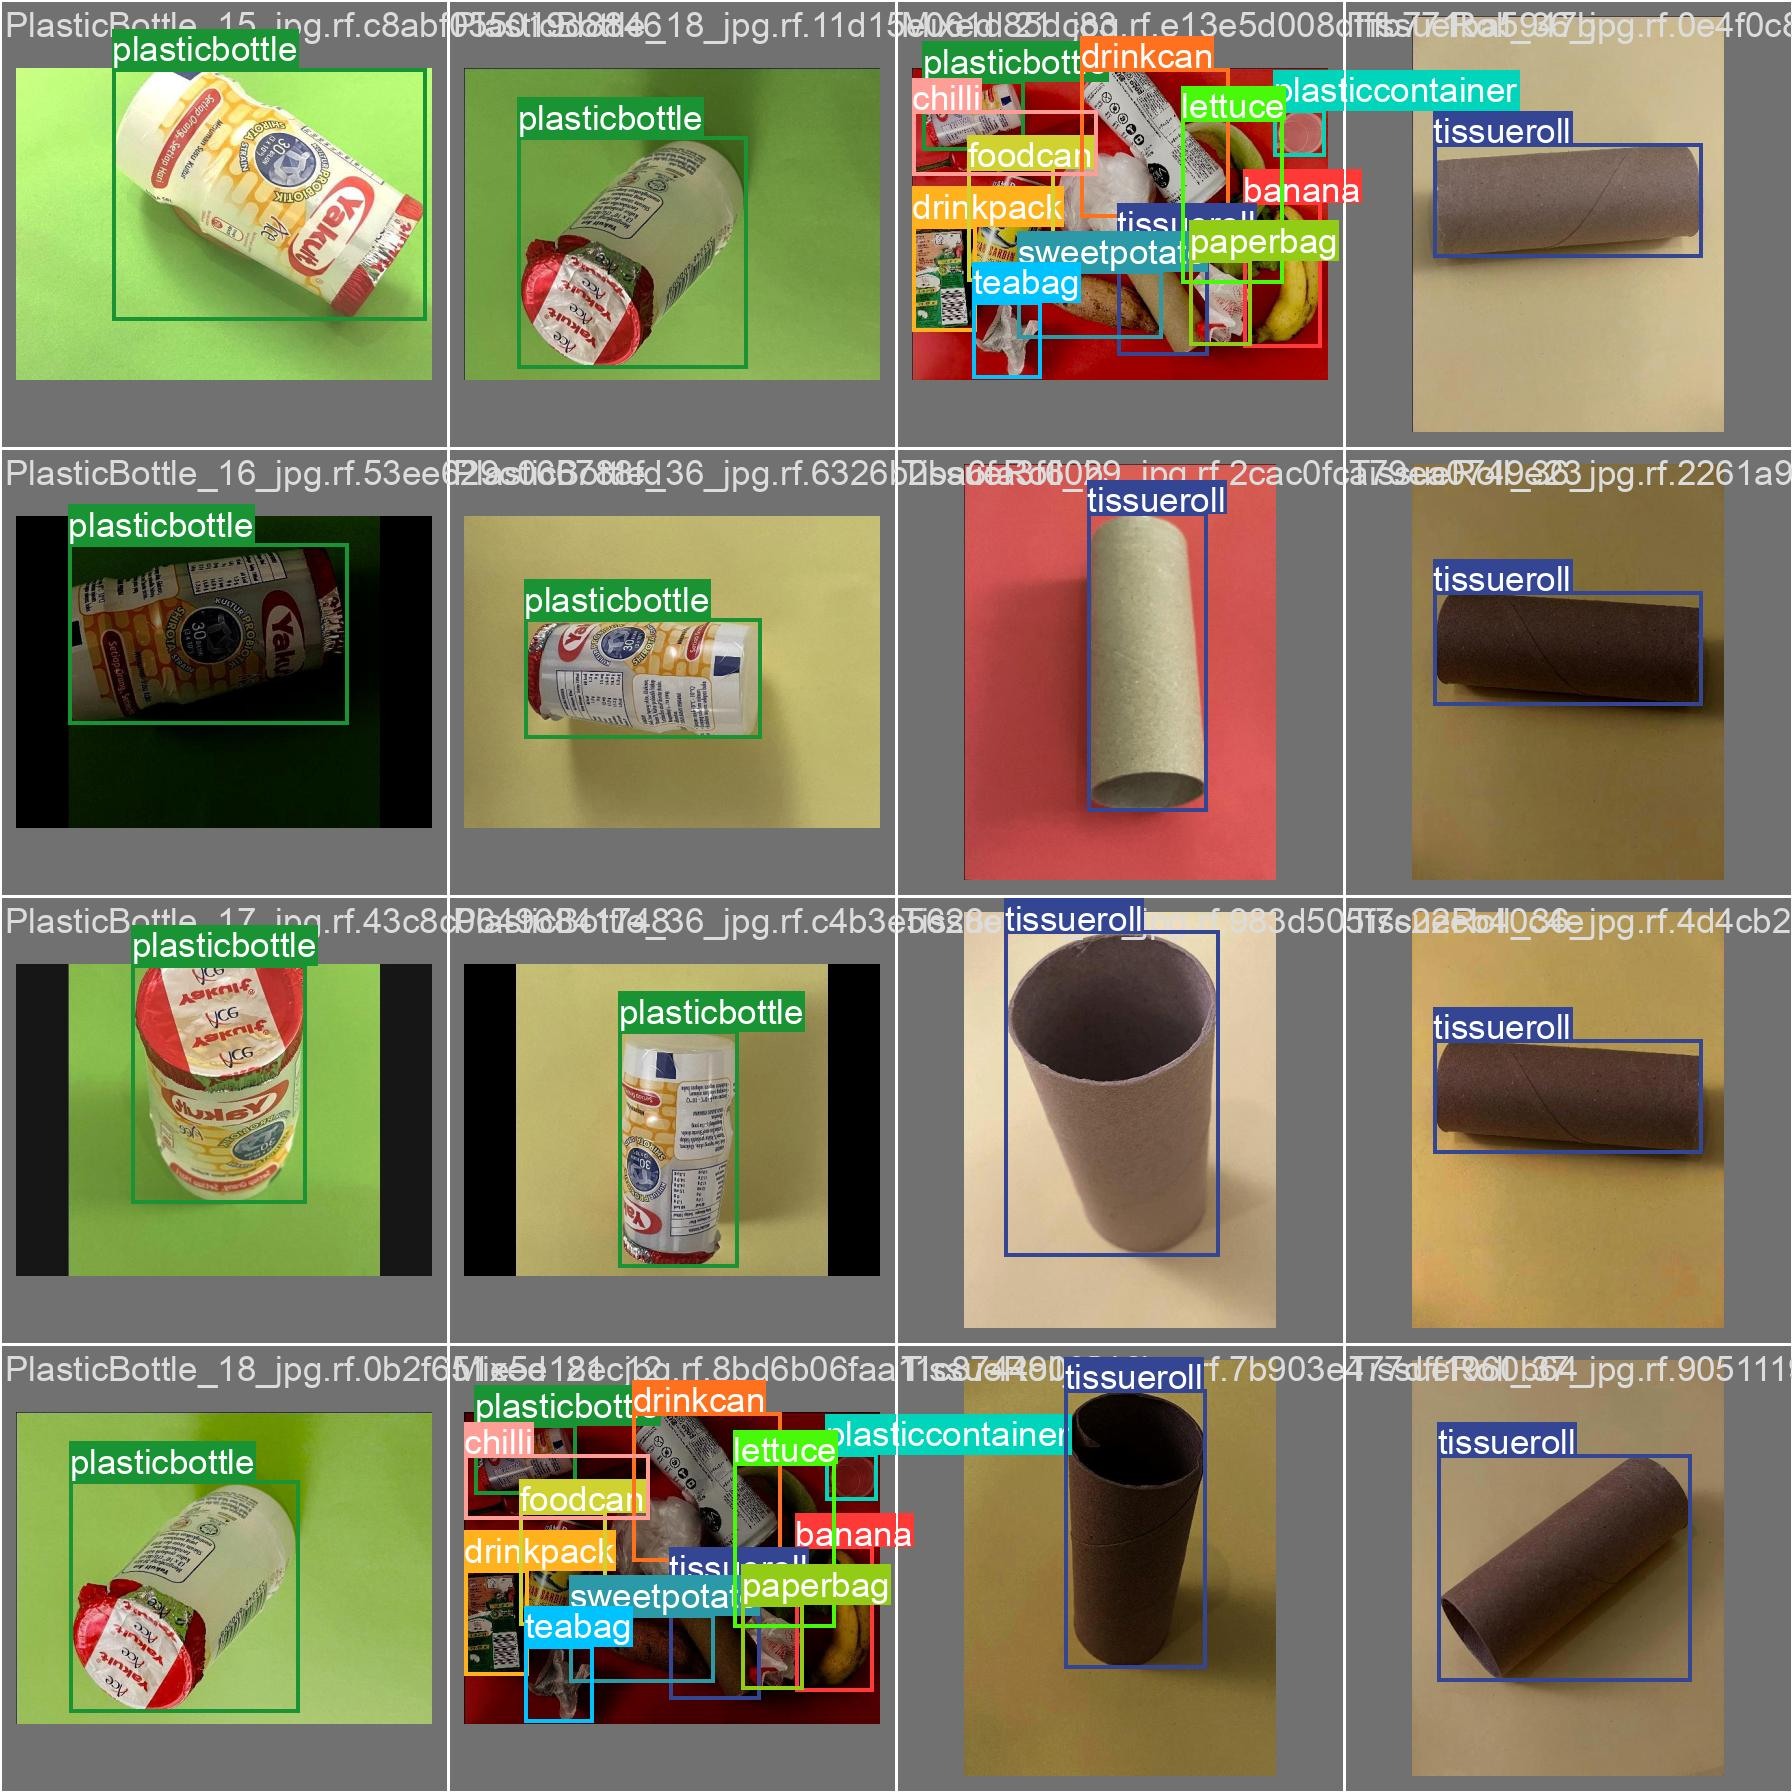

In [37]:
# we first display our ground truth
print('GROUND TRUTH TRAINING DATA:')
Image(filename='/content/yolov5/runs/train/yolov5s_results4/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA: 


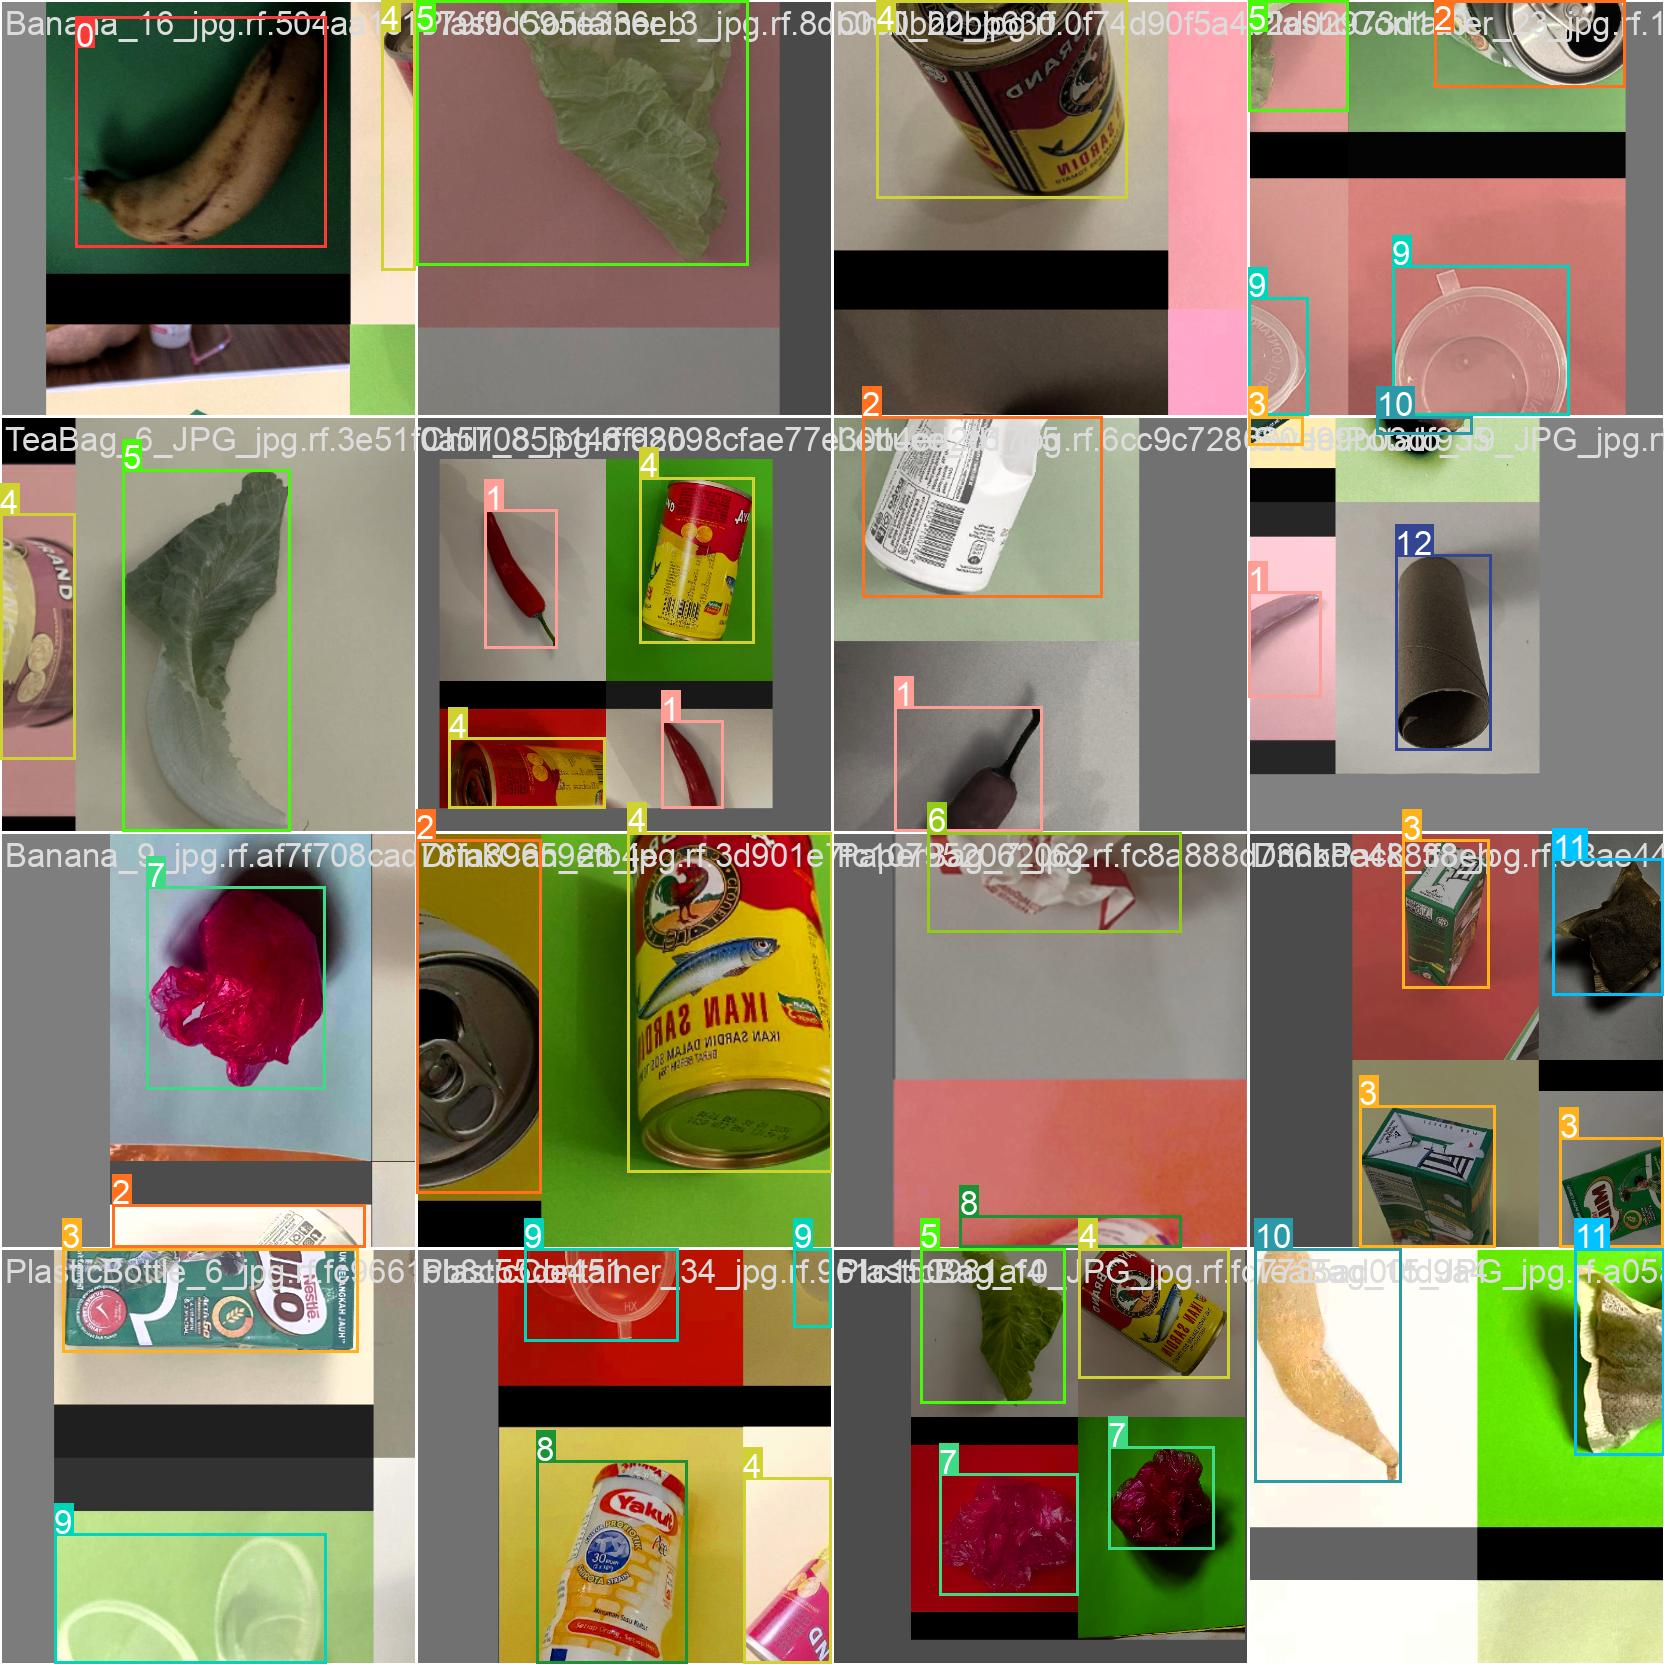

In [41]:
# We can then print an augmented training example
# the model runs augmentation during training to increase the data size. You can
# see below that multiple images are combined together
print("GROUND TRUTH AUGMENTED TRAINING DATA: ")
Image(filename='/content/yolov5/runs/train/yolov5s_results4/train_batch0.jpg', width=900)

## Run Inference with trained weights
### We run inference with a pretrained checkpoint on contents of test/images folder downloaded from Roboflow

In [42]:
# trained weights are saved by default in the weights folder
%ls runs/

train/


In [43]:
%ls runs/train/yolov5s_results4/weights

best.pt  last.pt


In [44]:
# we use the best weights
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results4/weights/best.pt --img 416 --conf 0.5 --source ../valid/images

/content/yolov5
detect: weights=['runs/train/yolov5s_results4/weights/best.pt'], source=../valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7278882 parameters, 0 gradients
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/459 /content/valid/images/Banana_10_jpg.rf.0f4f5f5b749f5681048000d59b667d94.jpg: 416x320 1 banana, 81.5ms
image 2/459 /content/valid/images/Banana_10_jpg.rf.5d587c81371bd16a3a5eba3af30ce089.jpg: 416x320 1 banana, 7.2ms
image 3/459 /content/valid/images/Banana

## Exporting the trained weights

In [45]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [48]:
%cp /content/yolov5/runs/train/yolov5s_results4/weights/best.pt /content/gdrive/MyDrive/